In [45]:
import numpy as np
import pandas as pd


In [46]:
df = pd.read_csv("/content/diabetes.csv")

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1. see how much each column is contributing to outcome

In [48]:
df.corr()["Outcome"]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [49]:
## if needed we can eliminate BloodPressure	SkinThickness

# 2. split data

In [50]:
# prompt: split X and Y

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3. standard scaling

In [51]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [52]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# 4. train test split

In [53]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. IMPORT tensorflow keras sequential and dense and fit model

In [54]:
# prompt: # 5. IMPORT tensorflow keras sequential and dense

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
# prompt: 2 layer dense model , relu sigmoid , adam , BCentropy , metrics accuracy

model = Sequential([
    Dense(32, activation='relu', input_dim=8),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# validation_split=0.2 means 80% of the training data is used for training and 20% for validation during training

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2597 - loss: 0.9533 - val_accuracy: 0.2846 - val_loss: 0.8554
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3297 - loss: 0.8348 - val_accuracy: 0.3008 - val_loss: 0.7933
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3367 - loss: 0.7730 - val_accuracy: 0.4390 - val_loss: 0.7452
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4992 - loss: 0.7103 - val_accuracy: 0.5366 - val_loss: 0.7064
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5762 - loss: 0.6747 - val_accuracy: 0.5772 - val_loss: 0.6728
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6514 - loss: 0.6458 - val_accuracy: 0.6504 - val_loss: 0.6457
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6813 - loss: 0.6345 - val_accuracy: 0.6829 - val_loss: 0.6230
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6966 - loss: 0.6019 - val_accuracy: 0.7154 - val_loss: 0.6047


# 6. check model with test data

In [56]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 100% of X_train is used for training, and 100% X_test is used as the validation set during training.


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7424 - loss: 0.5381 - val_accuracy: 0.7208 - val_loss: 0.5505
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7307 - loss: 0.5435 - val_accuracy: 0.7403 - val_loss: 0.5388
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7735 - loss: 0.5253 - val_accuracy: 0.7338 - val_loss: 0.5306
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7673 - loss: 0.5048 - val_accuracy: 0.7468 - val_loss: 0.5247
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7736 - loss: 0.4868 - val_accuracy: 0.7468 - val_loss: 0.5184
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7796 - loss: 0.4752 - val_accuracy: 0.7597 - val_loss: 0.5155
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7621 - loss: 0.5026 - val_accuracy: 0.7532 - val_loss: 0.5134
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7768 - loss: 0.4696 - val_accuracy: 0.753

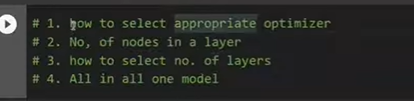

In [57]:


!pip install -q -U keras-tuner


In [58]:
import keras_tuner as kt

# 1. Define the model building function

In [59]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))

    # This line allows the tuner to choose the best optimizer from the given list during hyperparameter tuning

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# 2. Set up the tuner

In [60]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5
)
# This sets up a random search tuner to find the best hyperparameters
# - build_model: the model-building function to be tuned
# - objective: the metric to optimize ('val_accuracy' in this case)
# - max_trials: the number of different hyperparameter combinations to try

Reloading Tuner from ./untitled_project/tuner0.json


  # 3. Search for best hyperparameters


In [61]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [62]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [63]:
model = tuner.get_best_models(num_models=1)[0] # pick no. 1 model with higest score

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

# 4.now after getting best model continue training it from next epoch

In [65]:
model.fit(X_train, y_train,batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7180 - loss: 0.5495 - val_accuracy: 0.6948 - val_loss: 0.5797
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7309 - loss: 0.5237 - val_accuracy: 0.6818 - val_loss: 0.5662
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 0.5195 - val_accuracy: 0.7078 - val_loss: 0.5549
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7617 - loss: 0.4791 - val_accuracy: 0.7078 - val_loss: 0.5459
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7597 - loss: 0.4766 - val_accuracy: 0.7208 - val_loss: 0.5389
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7664 - loss: 0.4743 - val_accuracy: 0.7208 - val_loss: 0.5340
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7755 - loss: 0.4701 - val_accuracy: 0.7403 - val_loss: 0.5285
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7839 - loss: 0.4581 - val_accuracy:

# lets do same for no. of neurons in eahc layer

In [66]:
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    # Values will range from 8 to 128 with a step of 8
    units = hp.Int('units', min_value=8, max_value=128, step=8)

    model.add(Dense(units=units, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



In [67]:
# Random search tuner setup
# - Tries different values of 'units' hyperparameter
# - Optimizes for validation accuracy
# - Tries up to 5 different combinations
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='random_search',
    project_name='diabetes_tuning'
)


Reloading Tuner from random_search/diabetes_tuning/tuner0.json


In [68]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [69]:
tuner.get_best_hyperparameters()[0].values

{'units': 104}

In [70]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 104)            │           936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041 (4.07 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.fit(X_train, y_train,batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7298 - loss: 0.5263 - val_accuracy: 0.7597 - val_loss: 0.5164
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7495 - loss: 0.5041 - val_accuracy: 0.7597 - val_loss: 0.5049
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7876 - loss: 0.4464 - val_accuracy: 0.7727 - val_loss: 0.5014
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7778 - loss: 0.4642 - val_accuracy: 0.7727 - val_loss: 0.4975
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7926 - loss: 0.4431 - val_accuracy: 0.7597 - val_loss: 0.4948
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7806 - loss: 0.4661 - val_accuracy: 0.7597 - val_loss: 0.4978
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7785 - loss: 0.4439 - val_accuracy: 0.7532 - val_loss: 0.4992
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7917 - loss: 0.4277 - val_accuracy: 0.75

#  lets do same for No of layers

In [73]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(104, activation='relu', input_dim=8))

    # Add a tunable number of hidden layers between 1 and 10
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(Dense(104, activation='relu'))  # Each hidden layer has 72 neurons


    model.add(Dense(1, activation='sigmoid'))


    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']               # Track accuracy during training/validation
    )

    return model

In [74]:
# Set up the Keras Tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,              # Model building function
    objective='val_accuracy', # Metric to optimize
    max_trials=10,             # Try 10 different combinations of hyperparameters
    directory='mydir',        # Directory to store tuning results
    project_name='num_layers' # Project name for tracking
)


# Train for 5 epochs on training data and evaluate on validation data
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Reloading Tuner from mydir/num_layers/tuner0.json


In [75]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6}

In [76]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [77]:
model.fit(X_train, y_train,batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7481 - loss: 0.4933 - val_accuracy: 0.7727 - val_loss: 0.5198
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7872 - loss: 0.4621 - val_accuracy: 0.7662 - val_loss: 0.5351
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.4167 - val_accuracy: 0.7662 - val_loss: 0.5794
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7717 - loss: 0.4571 - val_accuracy: 0.6818 - val_loss: 0.5695
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7929 - loss: 0.4165 - val_accuracy: 0.7468 - val_loss: 0.5891
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.4122 - val_accuracy: 0.7792 - val_loss: 0.7013
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7779 - loss: 0.4359 - val_accuracy: 0.7143 - val_loss: 0.6164
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8034 - loss: 0.4007 - val_accuracy: 0.7

# now lets do final thing

## we will create model with hyperparamter no of layers and no of perceptrons in each layer

In [78]:
from keras.layers import Dropout
def build_model(hp):
    model = Sequential()

    # Input layer + First hidden layer: Tune the number of neurons
    model.add(Dense(units=hp.Int('input_units', min_value=8, max_value=128, step=8),
                    activation='relu', input_dim=8))

    # Add a tunable dropout layer after the first hidden layer
    model.add(Dropout(hp.Choice('dropout_input', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))


    # Add a tunable number of hidden layers between 0 and 10
    for i in range(hp.Int('num_layers', min_value=0, max_value=10)):
        # Tune the number of neurons in each hidden layer
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=8, max_value=128, step=8),
                        activation='relu'))
        # Add a tunable dropout layer after each hidden layer
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))


    # Output layer
    model.add(Dense(1, activation='sigmoid'))


    # Tune the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [79]:

# Set up the Keras Tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,            # Increased trials to explore more combinations
    directory='mydir',
    project_name='full_tuning'
)

Reloading Tuner from mydir/full_tuning/tuner0.json


In [80]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [81]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [82]:
for i in range(best_hps.get('num_layers')):
    print(f"Optimal units for layer {i} is: {best_hps.get(f'layer_{i}_units')}")

Optimal units for layer 0 is: 88
Optimal units for layer 1 is: 104
Optimal units for layer 2 is: 64
Optimal units for layer 3 is: 24
Optimal units for layer 4 is: 112
Optimal units for layer 5 is: 16
Optimal units for layer 6 is: 72
Optimal units for layer 7 is: 32
Optimal units for layer 8 is: 48


In [84]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the best model found by the tuner
model = tuner.get_best_models(num_models=1)[0]

# Print the summary of the best model architecture
model.summary()

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the best model with more epochs using the full training data
# We can start from epoch 0 here if we want to fully train the best model
model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 88)             │        10,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 104)            │         9,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 112)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 72)             │         1,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 48)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,065 (152.60 KB)

 Trainable params: 39,065 (152.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7601 - loss: 0.5080 - val_accuracy: 0.7857 - val_loss: 0.5338
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7884 - loss: 0.4846 - val_accuracy: 0.7727 - val_loss: 0.5314
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7921 - loss: 0.4666 - val_accuracy: 0.7532 - val_loss: 0.5375
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8062 - loss: 0.4279 - val_accuracy: 0.7792 - val_loss: 0.5230
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7801 - loss: 0.4446 - val_accuracy: 0.7078 - val_loss: 0.5475
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8055 - loss: 0.4386 - val_accuracy: 0.7597 - val_loss: 0.5442
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7894 - loss: 0.4398 - val_accuracy: 0.7468 - val_loss: 0.5365
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7938 - loss: 0.4437 - val_accuracy: 0.7662

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7775 - loss: 0.5205
Test Accuracy: 0.7857


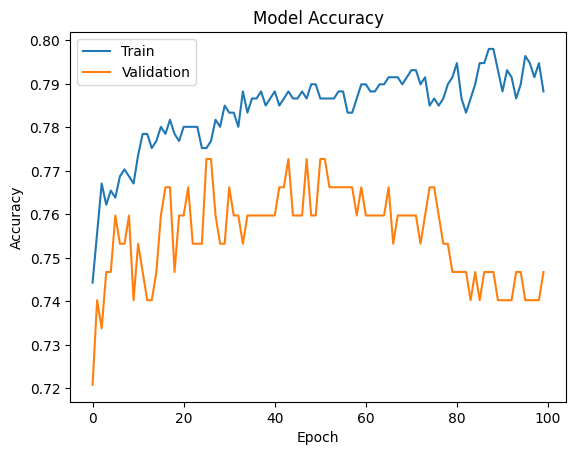

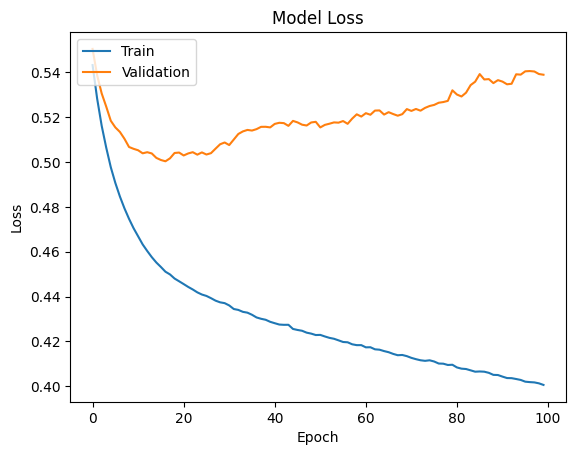

In [85]:
# prompt: print model accuracy and plot also

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
